In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# print(df)
df["target"] = diabetes.target
print(df.tail())
print(df.info())

          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non

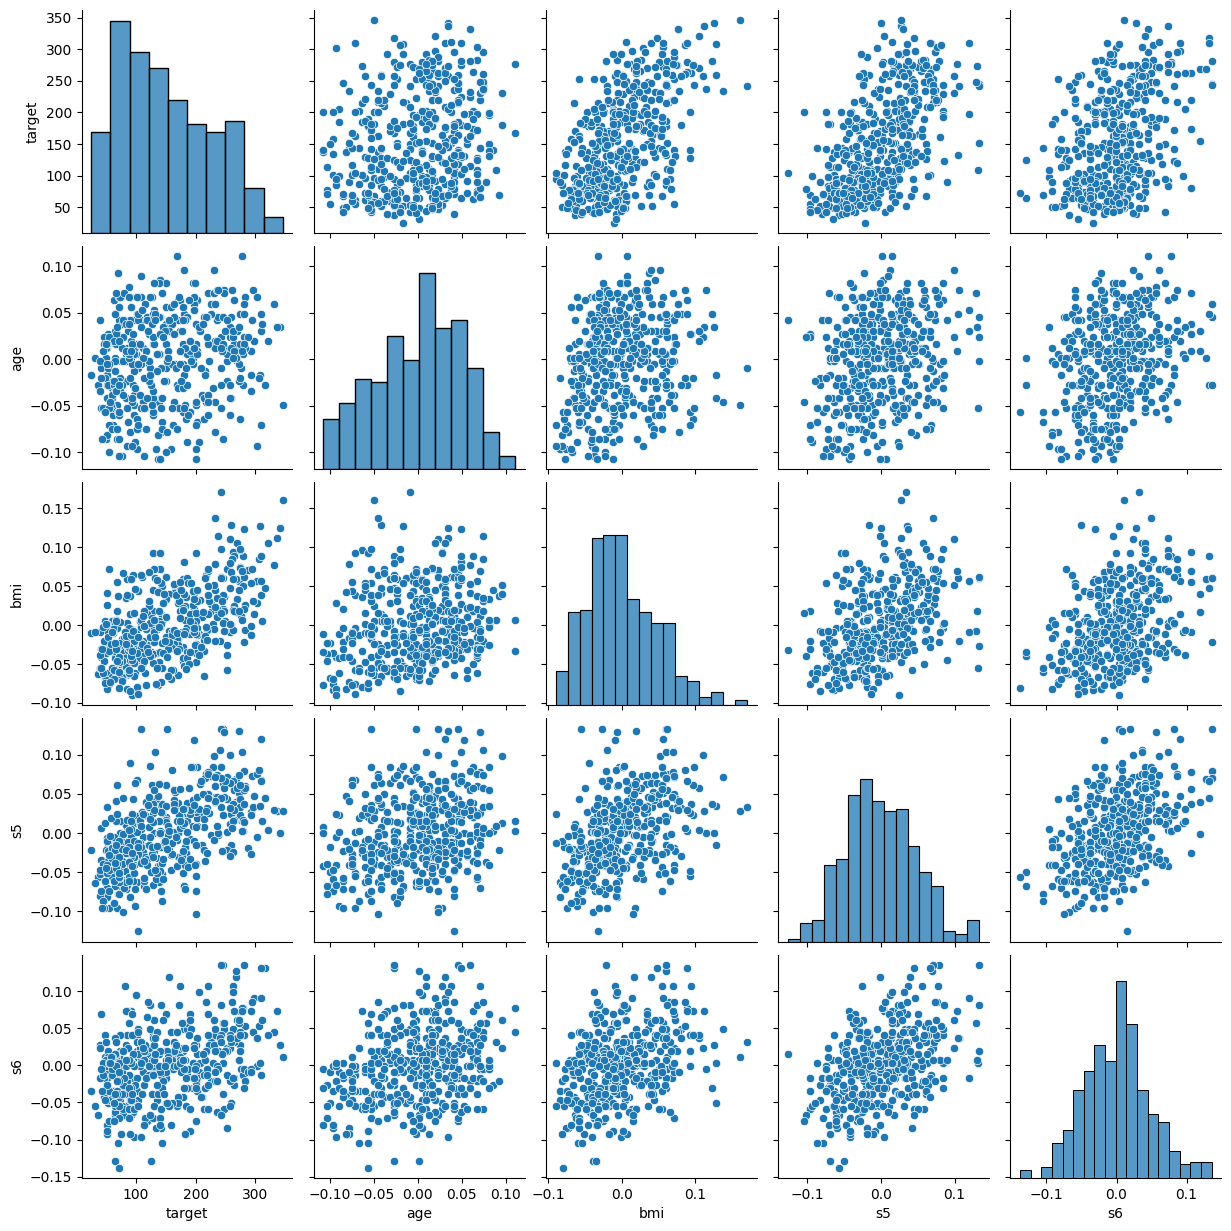

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[["target","age", "bmi", "s5", "s6"]])
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


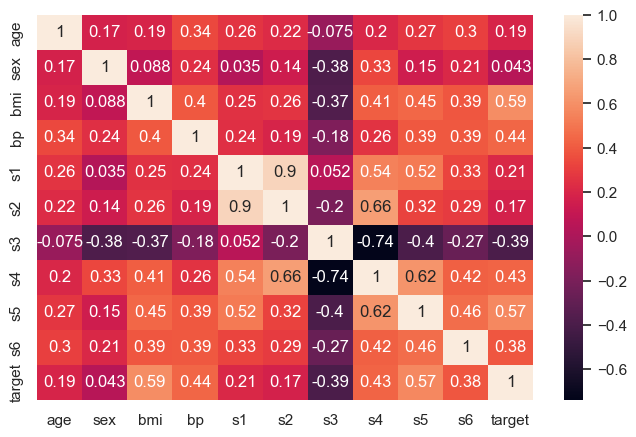

In [6]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [7]:
df = df[['target', 'bmi', 'bp', 's3', 's4', 's5', 's6']]
df

,target,bmi,bp,s3,s4,s5,s6
0,151.0,0.061696,0.021872,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.051474,-0.026328,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.044451,-0.005671,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.011595,-0.036656,-0.036038,0.034309,0.022692,-0.009362
4,135.0,-0.036385,0.021872,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...
437,178.0,0.019662,0.059744,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.015906,-0.067642,-0.028674,0.034309,-0.018118,0.044485
439,132.0,-0.015906,0.017282,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,0.039062,0.001215,-0.028674,0.026560,0.044528,-0.025930


In [8]:
plot_cols = ['target','bmi','bp','s3','s4', 's5', 's6']
plot_df = df.loc[:, plot_cols]
plot_df

,target,bmi,bp,s3,s4,s5,s6
0,151.0,0.061696,0.021872,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.051474,-0.026328,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.044451,-0.005671,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.011595,-0.036656,-0.036038,0.034309,0.022692,-0.009362
4,135.0,-0.036385,0.021872,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...
437,178.0,0.019662,0.059744,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.015906,-0.067642,-0.028674,0.034309,-0.018118,0.044485
439,132.0,-0.015906,0.017282,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,0.039062,0.001215,-0.028674,0.026560,0.044528,-0.025930


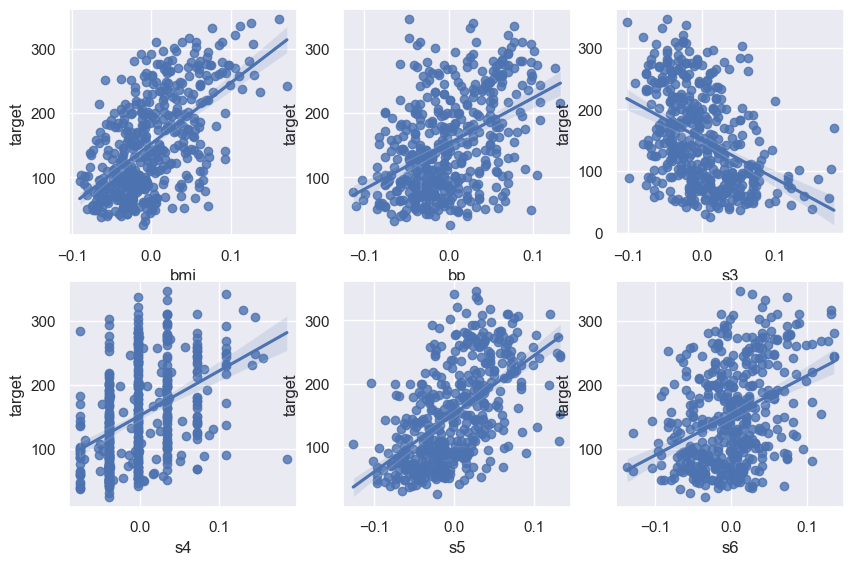

In [10]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(3, 3, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.show()

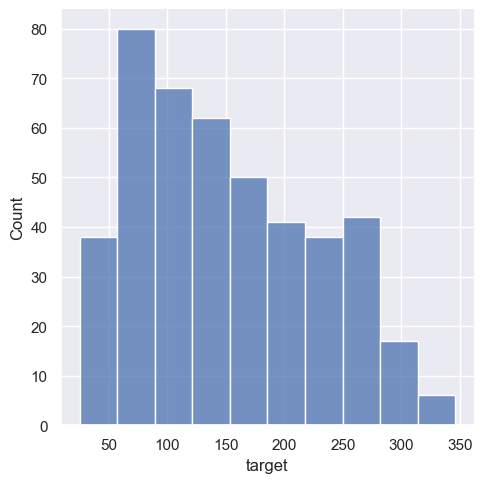

In [11]:
sns.displot(x='target', kind='hist', data=df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['bmi','bp','s3','s4', 's5', 's6']]
y_data = df.loc[:, 'target']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(353, 6) (353,)
(89, 6) (89,)


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [ 566.2  273.4 -266.  -134.7  505.8   85.5]
상수항(절편): 153.2


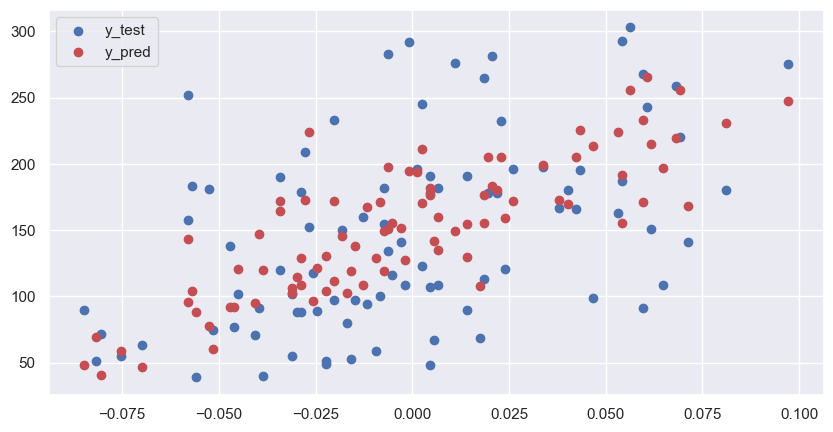

In [16]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['bmi'], y_test, label='y_test')
plt.scatter(x_test['bmi'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

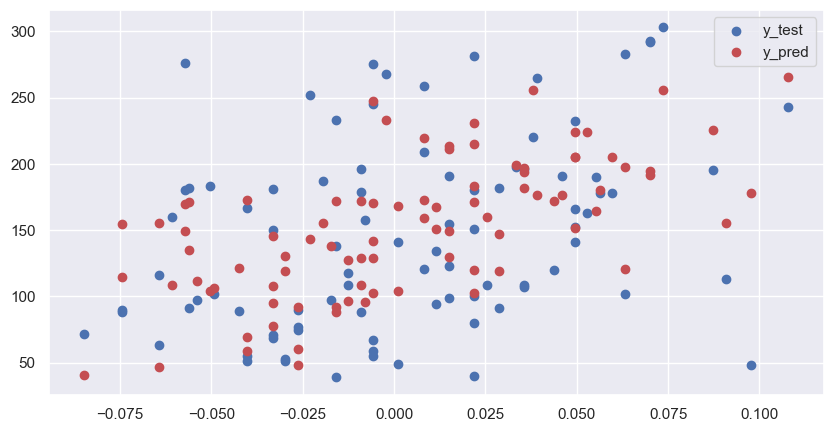

In [17]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['bp'], y_test, label='y_test')
plt.scatter(x_test['bp'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [18]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:2947.001717
Test MSE: 3235.754186


In [19]:
# cross_val-score 함수
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [3333.0622 3171.8175 3082.025  3746.9939 2349.5167]
평균 MSE:3136.683066


In [20]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape) # 각 피처에 대한 2차항이 추가 되어 피처개수가 늘어난다.

원본 학습 데이터 셋: (353, 6)
2차 다항식 변환 데이터 셋: (353, 28)


In [21]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # y_train은 실제 결과값

# 테스트 데이터에 대한 예측 밒 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test) # 학습한 예측결과랑 test값의 예측 결과 파악
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:2713.810388
Test MSE:3457.849846


In [22]:
print(lr.predict(x_train_poly))

[126.48200558 148.37842919 178.97374071 230.33792219  97.10401507
 198.00214207 132.9857224  233.68960087  83.3784136  131.89932334
 168.95472696 102.32252677 238.19755432 242.5777942  162.89034268
 301.90314666 233.17404467 140.84702227 188.05177762  63.68539578
 172.74900336  80.30516265 164.7046238  126.3919696   62.01859361
 105.53933693 187.86066148 118.69023131 219.17089308 112.62083111
  91.95229254 101.96223468  78.09796735 177.03864583 216.75450834
 152.95049872 271.39638296 163.81322116 162.58349448  97.81686842
 145.8290726   90.09683547 111.11414171 118.77976724 134.6616589
 135.95835027 179.25934037  96.54319447 157.20138785  92.28443648
  82.41836068  75.68854297 210.91836156 138.35609705 123.53078278
  90.24491778  81.4814634  175.99926584 311.62511469 157.32591909
 118.1597774  241.15404144 115.87063601 196.10196497  59.68577738
 188.93110111 146.63939735 123.12828475 154.98717919 191.47410817
 138.64865099 170.18017634 125.08576517 155.7774937  115.81746127
 180.425844

In [23]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE: 0.000
Test MSE:1348019.3462


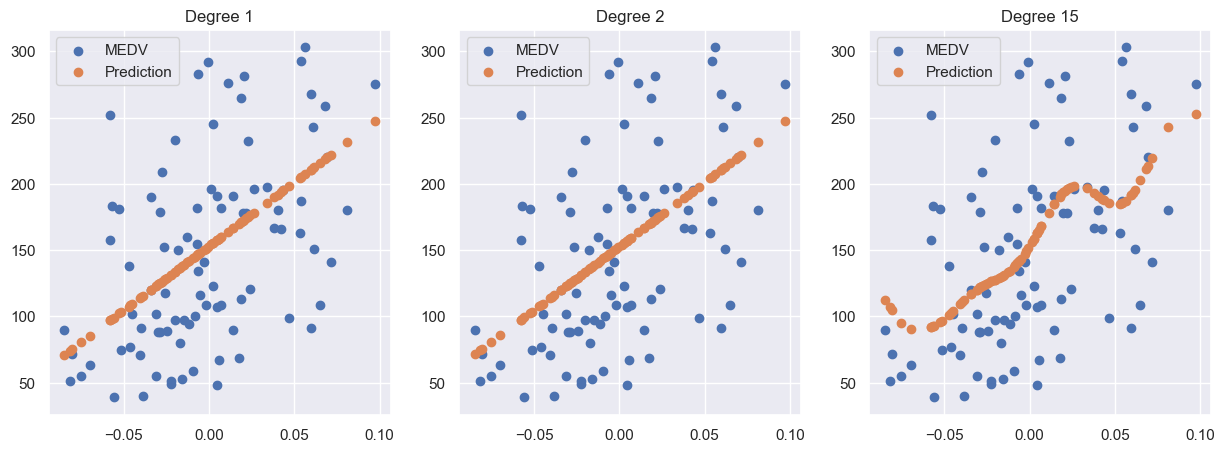

In [26]:
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['bmi']]) # 전채 행 선택후 열의 LSTAT선택 즉, RM제외
    x_test_poly = pf.fit_transform(x_test.loc[:, ['bmi']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['bmi']], y_test, label='MEDV')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['bmi']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()